In [ ]:
# update to the latest version
#! git pull

# Pandas


Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.<br>
* A fast and efficient DataFrame object for data manipulation with integrated indexing
* Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases
* Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form
* Flexible reshaping and pivoting of data sets;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Columns can be inserted and deleted from data structures for size mutability;
* Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets
* High performance merging and joining of data sets
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging<br>
<br>
The documentation can be found on
https://pandas.pydata.org/index.html

In [1]:
import pandas as pd #import pandas
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)

## 1. Series

* a one-dimensional object similar to an array, list, or column in a table. 
* It will assign a labeled index to each item in the Series. 
* By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

In [2]:
serie = pd.Series([3,3.14,'Seven',None])
serie

0        3
1     3.14
2    Seven
3     None
dtype: object

#### Index
we can also specify the index to be something different than increasing integer numbers


In [3]:
serie2 = pd.Series([3,3.14,'Seven',None], index=['a','b','c','d'])
serie2

a        3
b     3.14
c    Seven
d     None
dtype: object

or you can change it again

In [4]:
serie2.index = ['integer','float','string','null']
serie2

integer        3
float       3.14
string     Seven
null        None
dtype: object

### Create a series from a dictionary
This is very useful, because a dictionary is a python representation of a `json` format

In [5]:
d_cities_population = {'Amsterdam':821752,
     'Istanbul':15030000,
     'London': 8200000, 
     'Paris': 2206000, 
     'Frankfurt':  732688 , 
     'Berlin': 3700000, 
     'Hamburg': 1800000, 
     'Manchester': 541000}
cities_population = pd.Series(d_cities_population)
cities_population

Amsterdam       821752
Istanbul      15030000
London         8200000
Paris          2206000
Frankfurt       732688
Berlin         3700000
Hamburg        1800000
Manchester      541000
dtype: int64

## Accessing the data

#### Index



In [6]:
cities_population.index

Index(['Amsterdam', 'Istanbul', 'London', 'Paris', 'Frankfurt', 'Berlin',
       'Hamburg', 'Manchester'],
      dtype='object')

#### Values

In [7]:
cities_population.values

array([  821752, 15030000,  8200000,  2206000,   732688,  3700000,
        1800000,   541000])

## Sorting and Filtering

### Sort the cities by population

In [8]:
# if you do not specify ascending = False, it will use the default value
# which is ascending = True
cities_population.sort_values(ascending = False) 

Istanbul      15030000
London         8200000
Berlin         3700000
Paris          2206000
Hamburg        1800000
Amsterdam       821752
Frankfurt       732688
Manchester      541000
dtype: int64

## Intermezzo 
It is always useful to read the documentation of the function.<br>
For this you can use the help function from the Jupyter Notebook

In [9]:
help(cities_population.sort_values)

Help on method sort_values in module pandas.core.series:

sort_values(axis=0, ascending=True, inplace:bool=False, kind:str='quicksort', na_position:str='last', ignore_index:bool=False, key:Union[Callable[[_ForwardRef('Series')], Union[_ForwardRef('Series'), ~AnyArrayLike]], NoneType]=None) method of pandas.core.series.Series instance
    Sort by the values.
    
    Sort a Series in ascending or descending order by some
    criterion.
    
    Parameters
    ----------
    axis : {0 or 'index'}, default 0
        Axis to direct sorting. The value 'index' is accepted for
        compatibility with DataFrame.sort_values.
    ascending : bool, default True
        If True, sort values in ascending order, otherwise descending.
    inplace : bool, default False
        If True, perform operation in-place.
    kind : {'quicksort', 'mergesort' or 'heapsort'}, default 'quicksort'
        Choice of sorting algorithm. See also :func:`numpy.sort` for more
        information. 'mergesort' is the o

# Exercise 1
What happens if we use <br>
`cities_population.sort_values(inplace=True)`

### Filtering

I am interested in knowing which cities have more than 1 million citizens

In [10]:
cities_population>1000000

Amsterdam     False
Istanbul       True
London         True
Paris          True
Frankfurt     False
Berlin         True
Hamburg        True
Manchester    False
dtype: bool

Now it returns a mask (`true` or `false`) that can be used for filtering.<br>
Example

In [11]:
cities_population[cities_population>1000000]

Istanbul    15030000
London       8200000
Paris        2206000
Berlin       3700000
Hamburg      1800000
dtype: int64

Or the inverse by using the `~` sign in fron of the mask

In [12]:
mask = cities_population>1000000

In [13]:
cities_population[~mask]

Amsterdam     821752
Frankfurt     732688
Manchester    541000
dtype: int64

#### Note!!!<br> 
you can save the masked filter into a variable (in the example `mask`) or use it explicity (like done above

### Create a dataframe from two series.
For this purpose, we need a new series with similar indexes<br>
Let's create one

In [14]:
d_cities_country = {'Amsterdam':'Netherlands',
     'Istanbul':'Turkey',
     'London': 'UK', 
     'Paris': 'France', 
     'Frankfurt': 'Germany', 
     'Berlin': 'Germany', 
     'Hamburg': 'Germany', 
     'Lyon':'France',
     'Manchester': 'UK'}
cities_country = pd.Series(d_cities_country)
cities_country

Amsterdam     Netherlands
Istanbul           Turkey
London                 UK
Paris              France
Frankfurt         Germany
Berlin            Germany
Hamburg           Germany
Lyon               France
Manchester             UK
dtype: object

### Counting values
How many cities do I have per country in by dataset?

In [15]:
cities_country.value_counts()

Germany        3
France         2
UK             2
Turkey         1
Netherlands    1
dtype: int64

### Note the output of value_counts is a Serie, where now the index is the unique value, and the value is the number of times it appears

What would happen if we apply `value_counts` twice, i.e.<br>

`cities_country.value_counts().value_counts()`?

# 2 Dataframes

* Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). 
* Arithmetic operations align on both row and column labels. 
* Can be thought of as a dict-like container for Series objects. 
* The primary pandas data structure.

### pandas concat

Read the `help(pd.concat)` to see what this is doing

In [16]:
pd.concat([cities_country, cities_population])

Amsterdam     Netherlands
Istanbul           Turkey
London                 UK
Paris              France
Frankfurt         Germany
Berlin            Germany
Hamburg           Germany
Lyon               France
Manchester             UK
Amsterdam          821752
Istanbul         15030000
London            8200000
Paris             2206000
Frankfurt          732688
Berlin            3700000
Hamburg           1800000
Manchester         541000
dtype: object

### Not really what we wanted, right?
* Pandas uses a `'two-dimensional'` representation of the data (table), with  rows and columns.<br>
* When applying an operation, we need to specify the direction (i.e. along the rows of the columns)<br>
* This is defined by the `axis` parameter

In [17]:
### concat along the 2nd axix (python starts indexing from 0)
### We will save the output into a new object, called cities
cities=pd.concat([cities_country, cities_population], axis = 1)

In [18]:
cities

,0,1
Amsterdam,Netherlands,821752.0
Istanbul,Turkey,15030000.0
London,UK,8200000.0
Paris,France,2206000.0
Frankfurt,Germany,732688.0
Berlin,Germany,3700000.0
Hamburg,Germany,1800000.0
Lyon,France,NaN
Manchester,UK,541000.0


#### This is a DataFrame

In [19]:
type(cities)

pandas.core.frame.DataFrame

### How about we give a nice name to the columns?

In [20]:
cities.columns=['Country','Population']
cities

,Country,Population
Amsterdam,Netherlands,821752.0
Istanbul,Turkey,15030000.0
London,UK,8200000.0
Paris,France,2206000.0
Frankfurt,Germany,732688.0
Berlin,Germany,3700000.0
Hamburg,Germany,1800000.0
Lyon,France,NaN
Manchester,UK,541000.0


### Accessing the column

In [21]:
cities['Country']

Amsterdam     Netherlands
Istanbul           Turkey
London                 UK
Paris              France
Frankfurt         Germany
Berlin            Germany
Hamburg           Germany
Lyon               France
Manchester             UK
Name: Country, dtype: object

# Exercise 2:
What is the difference between :
* `cities['Country']`
* `cities[['Country']]`
* `cities.Country`

### Filters, sorting
It works the same way as in Series<br>
Let's filter out the missing value of `Lyon`
the function isnull() will tell if the value is null or not

cities.isnull()

and we can use this mapping for filtering values

In [22]:
cities[~cities.Population.isnull()] #remember, ~ is negation

,Country,Population
Amsterdam,Netherlands,821752.0
Istanbul,Turkey,15030000.0
London,UK,8200000.0
Paris,France,2206000.0
Frankfurt,Germany,732688.0
Berlin,Germany,3700000.0
Hamburg,Germany,1800000.0
Manchester,UK,541000.0


## Operations on the DataFrame

Let's create a function that will categorise the cities in EU and non EU ones

In [23]:
def is_EU(x):
    return x in ['Netherlands','Germany','UK','France']

def is_EU_after2019(x):
    '''
    remove the UK after Brexit
    '''
    return x in ['Netherlands','Germany','France']

In [24]:
cities['Country'].apply(is_EU)

Amsterdam      True
Istanbul      False
London         True
Paris          True
Frankfurt      True
Berlin         True
Hamburg        True
Lyon           True
Manchester     True
Name: Country, dtype: bool

In [25]:
cities['Country'].apply(is_EU_after2019)

Amsterdam      True
Istanbul      False
London        False
Paris          True
Frankfurt      True
Berlin         True
Hamburg        True
Lyon           True
Manchester    False
Name: Country, dtype: bool

### But We would like something nicer, like a column saying if it is EU or non EU

In [26]:
cities

,Country,Population
Amsterdam,Netherlands,821752.0
Istanbul,Turkey,15030000.0
London,UK,8200000.0
Paris,France,2206000.0
Frankfurt,Germany,732688.0
Berlin,Germany,3700000.0
Hamburg,Germany,1800000.0
Lyon,France,NaN
Manchester,UK,541000.0


### Applying a function return a series. We can add it as a new column to the dataframe

In [27]:
cities['isEU']=cities['Country'].apply(is_EU_after2019)

In [28]:
cities

,Country,Population,isEU
Amsterdam,Netherlands,821752.0,True
Istanbul,Turkey,15030000.0,False
London,UK,8200000.0,False
Paris,France,2206000.0,True
Frankfurt,Germany,732688.0,True
Berlin,Germany,3700000.0,True
Hamburg,Germany,1800000.0,True
Lyon,France,NaN,True
Manchester,UK,541000.0,False


In [29]:
### Lets now convert it into Strings
cities['European_Union']=cities.isEU.apply(lambda x: 'EU' if x else 'no EU')

In [30]:
cities

,Country,Population,isEU,European_Union
Amsterdam,Netherlands,821752.0,True,EU
Istanbul,Turkey,15030000.0,False,no EU
London,UK,8200000.0,False,no EU
Paris,France,2206000.0,True,EU
Frankfurt,Germany,732688.0,True,EU
Berlin,Germany,3700000.0,True,EU
Hamburg,Germany,1800000.0,True,EU
Lyon,France,NaN,True,EU
Manchester,UK,541000.0,False,no EU


### The drop function
 

In [31]:
cities.drop('isEU', axis=1)

,Country,Population,European_Union
Amsterdam,Netherlands,821752.0,EU
Istanbul,Turkey,15030000.0,no EU
London,UK,8200000.0,no EU
Paris,France,2206000.0,EU
Frankfurt,Germany,732688.0,EU
Berlin,Germany,3700000.0,EU
Hamburg,Germany,1800000.0,EU
Lyon,France,NaN,EU
Manchester,UK,541000.0,no EU


### The same can be achieved by selecting the columns we want to keep

In [32]:
cities[['Country','Population','European_Union']]

,Country,Population,European_Union
Amsterdam,Netherlands,821752.0,EU
Istanbul,Turkey,15030000.0,no EU
London,UK,8200000.0,no EU
Paris,France,2206000.0,EU
Frankfurt,Germany,732688.0,EU
Berlin,Germany,3700000.0,EU
Hamburg,Germany,1800000.0,EU
Lyon,France,NaN,EU
Manchester,UK,541000.0,no EU


In [33]:
#REMOVE IN PLACE
cities.drop('isEU',inplace=True, axis=1)

In [34]:
cities

,Country,Population,European_Union
Amsterdam,Netherlands,821752.0,EU
Istanbul,Turkey,15030000.0,no EU
London,UK,8200000.0,no EU
Paris,France,2206000.0,EU
Frankfurt,Germany,732688.0,EU
Berlin,Germany,3700000.0,EU
Hamburg,Germany,1800000.0,EU
Lyon,France,NaN,EU
Manchester,UK,541000.0,no EU


## Missing Values

Missing values can be replaced by the fillna function.<br>
Let's see the help

In [35]:
help(cities.fillna)

Help on method fillna in module pandas.core.frame:

fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None) -> Union[_ForwardRef('DataFrame'), NoneType] method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to fill gap.
    axis : {0 or 'index', 1 or 'columns'}
        Axis along wh

For our use case, we want to replace the Population of Lyon with the value we know from Wikipedia, cca half a milion

In [36]:
cities.fillna(value=500000)

,Country,Population,European_Union
Amsterdam,Netherlands,821752.0,EU
Istanbul,Turkey,15030000.0,no EU
London,UK,8200000.0,no EU
Paris,France,2206000.0,EU
Frankfurt,Germany,732688.0,EU
Berlin,Germany,3700000.0,EU
Hamburg,Germany,1800000.0,EU
Lyon,France,500000.0,EU
Manchester,UK,541000.0,no EU


### It might be a bit safer to specify directly the column

In [37]:
cities.Population.fillna(value=500000,inplace=True) # note the inplace=True

In [38]:
cities

,Country,Population,European_Union
Amsterdam,Netherlands,821752.0,EU
Istanbul,Turkey,15030000.0,no EU
London,UK,8200000.0,no EU
Paris,France,2206000.0,EU
Frankfurt,Germany,732688.0,EU
Berlin,Germany,3700000.0,EU
Hamburg,Germany,1800000.0,EU
Lyon,France,500000.0,EU
Manchester,UK,541000.0,no EU


## Exercise 3:
The population is a float. Convert it to integers

## Group-By and Aggregations

In [39]:
grouped_cities = cities.groupby('Country')

Is it a Dataframe? Not really

In [40]:
type(grouped_cities)

pandas.core.groupby.generic.DataFrameGroupBy

#### Loop over the different groups

In [41]:
for group, df in grouped_cities:
    print(df)
    print('\n')

      Country  Population European_Union
Paris  France   2206000.0             EU
Lyon   France    500000.0             EU


           Country  Population European_Union
Frankfurt  Germany    732688.0             EU
Berlin     Germany   3700000.0             EU
Hamburg    Germany   1800000.0             EU


               Country  Population European_Union
Amsterdam  Netherlands    821752.0             EU


         Country  Population European_Union
Istanbul  Turkey  15030000.0          no EU


           Country  Population European_Union
London          UK   8200000.0          no EU
Manchester      UK    541000.0          no EU




### Apply functions

Sum the population of the country

In [42]:
grouped_cities['Population'].sum()

Country
France          2706000.0
Germany         6232688.0
Netherlands      821752.0
Turkey         15030000.0
UK              8741000.0
Name: Population, dtype: float64

### Multiple aggregations

#### The group-by key (Country in our case) is by default is now an index.

But it is probably more useful to have it as a columt in a new DataFrame.<br>
If you check the groupby documentation, we can see that there is the parameters `as_index`, which is True by default.<br>
Setting it to False does the trick

In [43]:
countries = cities.groupby('Country', as_index=False)['Population'].aggregate(
    {'Total_population':'sum', 'Average_popoulation':'mean'}
)
countries

,Country,Total_population,Average_popoulation
0,France,2706000.0,1.353000e+06
1,Germany,6232688.0,2.077563e+06
2,Netherlands,821752.0,8.217520e+05
3,Turkey,15030000.0,1.503000e+07
4,UK,8741000.0,4.370500e+06


## Joining DataFrames
https://pandas.pydata.org/pandas-docs/stable/merging.html

In [44]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how:str='inner', on=None, left_on=None, right_on=None, left_index:bool=False, right_index:bool=False, sort:bool=False, suffixes=('_x', '_y'), copy:bool=True, indicator:bool=False, validate=None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a S

In [45]:
pd.merge(left=cities,
        right = countries,
        on='Country')

,Country,Population,European_Union,Total_population,Average_popoulation
0,Netherlands,821752.0,EU,821752.0,8.217520e+05
1,Turkey,15030000.0,no EU,15030000.0,1.503000e+07
2,UK,8200000.0,no EU,8741000.0,4.370500e+06
3,UK,541000.0,no EU,8741000.0,4.370500e+06
4,France,2206000.0,EU,2706000.0,1.353000e+06
5,France,500000.0,EU,2706000.0,1.353000e+06
6,Germany,732688.0,EU,6232688.0,2.077563e+06
7,Germany,3700000.0,EU,6232688.0,2.077563e+06
8,Germany,1800000.0,EU,6232688.0,2.077563e+06


### Where are the names of the cities?

In [46]:
cities['City'] = cities.index

In [47]:
cities.reset_index(drop=True, inplace=True)

### Now we can rejoin

In [48]:
extended_cities = pd.merge(left=cities,
        right = countries,
        on='Country')
extended_cities

,Country,Population,European_Union,City,Total_population,Average_popoulation
0,Netherlands,821752.0,EU,Amsterdam,821752.0,8.217520e+05
1,Turkey,15030000.0,no EU,Istanbul,15030000.0,1.503000e+07
2,UK,8200000.0,no EU,London,8741000.0,4.370500e+06
3,UK,541000.0,no EU,Manchester,8741000.0,4.370500e+06
4,France,2206000.0,EU,Paris,2706000.0,1.353000e+06
5,France,500000.0,EU,Lyon,2706000.0,1.353000e+06
6,Germany,732688.0,EU,Frankfurt,6232688.0,2.077563e+06
7,Germany,3700000.0,EU,Berlin,6232688.0,2.077563e+06
8,Germany,1800000.0,EU,Hamburg,6232688.0,2.077563e+06


## Now we have more information. We could use it to create more features/variables

For instance, I want to know which fraction of the country population is from a given city

In [49]:
extended_cities['Populatiion_fraction']=extended_cities['Population']/extended_cities['Total_population']
extended_cities

,Country,Population,European_Union,City,Total_population,Average_popoulation,Populatiion_fraction
0,Netherlands,821752.0,EU,Amsterdam,821752.0,8.217520e+05,1.000000
1,Turkey,15030000.0,no EU,Istanbul,15030000.0,1.503000e+07,1.000000
2,UK,8200000.0,no EU,London,8741000.0,4.370500e+06,0.938108
3,UK,541000.0,no EU,Manchester,8741000.0,4.370500e+06,0.061892
4,France,2206000.0,EU,Paris,2706000.0,1.353000e+06,0.815225
5,France,500000.0,EU,Lyon,2706000.0,1.353000e+06,0.184775
6,Germany,732688.0,EU,Frankfurt,6232688.0,2.077563e+06,0.117556
7,Germany,3700000.0,EU,Berlin,6232688.0,2.077563e+06,0.593644
8,Germany,1800000.0,EU,Hamburg,6232688.0,2.077563e+06,0.288800


# 3 Reading data from files

So far we have seen academic examples with random generated data.<br>
Let's actually see how we can import data from files

In [50]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer:Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal:str='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into D

In [51]:
data = pd.read_csv('https://raw.githubusercontent.com/anilkumarpanda/python-training-2021/main/data/UCI_Credit_Card.csv')

The dataset has been downloaded from kaggle

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

### Let's get some general information about the dataset

How many rows and columns?

In [52]:
data.shape
# 30000 rows and 25 columns

(30000, 25)

Which columns do we have?

In [53]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

Can we say something more about it? For instance, of which type is the data contained in the columns?

In [54]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

# Exercise: 
Convert the name of the column from PAY_0 to PAY_1 using the rename method.

*** your solution here ***

Checking only the first 10 rows to inspect the values

In [55]:
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


Or the last 7

In [56]:
data.tail(7)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29993,29994,100000.0,1,1,2,38,0,-1,-1,0,0,0,3042.0,1427.0,102996.0,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0
29994,29995,80000.0,1,2,2,34,2,2,2,2,2,2,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


## See some statistics about my dataset

In [57]:
data.describe() # shows the basic stats about the dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Missing values
Before starting processing the data, we need to check if there are any missing values.

In [58]:
data.isnull().head() # returns True if any of the values in the column is missing, otherwise it is a false

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
# any() applieas the any() function on all the columns. 
# If there is a single value that is True, it will return True
data.isnull().any() 

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

In our case we are lucky (all the values are False, we do not have any missing values). <br>
However, in case of missing values, one needs to think of a strategy to deal with them

# Intermezzo: List comprehension in python and applications to a Dataframe
List comprehension is an elegant way to define and create lists in Python. <br>

Example: I want to create a list of the numbers from 1 to 10 that are divisible by 3



In [60]:
# Returns all the numbers from 0 to 9 included
[x for x in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [61]:
# Returns all the numbers from 0 to 9 included where the remainder of the division by 3 is 0 
# (hence numbers divisible by 3)
[x for x in range(10) if x%3==0]

[0, 3, 6, 9]

##### Back to the DataFrames
Example: `data.columns` will return an iterable that will represent the columns of the DataSet. <br>

Let's say we are interested in showing the statistics of the columns related to the BILL of the month.<br>
All of this columns start with `BILL_*`, and we can use this knowledge to select them in one line of code

In [62]:
# List comprehension
# Return all the columns of the dataframe data where the first 4 characthers equal 'BILL'
[col for col in data.columns if col[:4]=='BILL']

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [63]:
# And using this to slice the columns
data[[col for col in data.columns if col[:4]=='BILL']].head() # remember, head() shows only the first 5 rows

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0


Another example: <br>
    
Let's find the 'categorial' variables: let's assume that categorical variables are those with less than 10 unique values.<br>
`data['PAY_1'].unique()` will return all the unique values of PAY_1 category 

In [64]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [65]:
print('array:',data['PAY_0'].unique()) # returns the array
print('length:',data['PAY_0'].unique().shape[0]) # returns the length of the array

array: [ 2 -1  0 -2  1  3  4  8  7  5  6]
length: 11


Using list comprehension, we can find the 'categorical' columns

In [66]:
[col for col in data.columns if data[col].unique().shape[0]<10]

['SEX', 'EDUCATION', 'MARRIAGE', 'default.payment.next.month']

## Categorical variables

The trick that we have shown above works in most of the cases, however, one needs to be careful with categorical variables.<br>
By taking the definition from wikipedia:<br>
* In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.<br>

Categorical variables if represented with numbers (like in our example) could induce our machine learning model in trouble, as the model will interpret them as ordered values.<br>
Take the categorical variables in  our dataset: 
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)

One can see that `FEMALE`>`MALE` (2>1), but this does not make any sense from the mathematical point of view.
Let's do the exercise, and then we will see how to deal with it

# Exercise 4:
Create a function that will replace the categorical variables for Sex with the written literal,<br>
i.e. insetead of 1 returns 'MALE', instead of 2 returns 'FEMALE' <br>

Do the same for education and marriage

and apply it to the dataset(recall, `data.apply(function)`)

In [67]:
*** your solutions here ***

SyntaxError: invalid syntax (<ipython-input-67-84da66376892>, line 1)

In [68]:
*** your solutions here ***

SyntaxError: invalid syntax (<ipython-input-68-84da66376892>, line 1)

In [69]:
*** your solutions here ***

SyntaxError: invalid syntax (<ipython-input-69-84da66376892>, line 1)

In [70]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Exporting the dataframe to a file 

The dataframe can be exported to different format, using different functions, with the most common being:<br>
* `to_csv()`: save it to a csv (comma separated values) file
* `to_pickle()`: save it to pickle. Pickle is a compression of python objects. It is useful to save any form of object (like your data, but also models, arrays etc) that can be read in another python session
* `to_json()`: save it to json
* `to_excel()`: well, we work in a bank, sometimes we need excel as well :(

Read the documentation of each function, to be sure you do not miss some important details

In [73]:
data.to_csv('data/processed_data_trainees.csv')


In [74]:
# lets see the content of the folder data (! executes a unix command, but this goes beyond the scope of this training)
! ls -lh data

total 13168
-rw-r--r--  1 ei08ob  staff   2.7M Oct 14  2019 UCI_Credit_Card.csv
-rw-r--r--  1 ei08ob  staff    58K Jan 13 12:23 california_cities.csv
-rw-r--r--  1 ei08ob  staff   3.6M Jan 19 17:08 processed_data_trainees.csv


# Plotting with pandas
Pandas has some integrated functions to do quick plots

#### Histograms

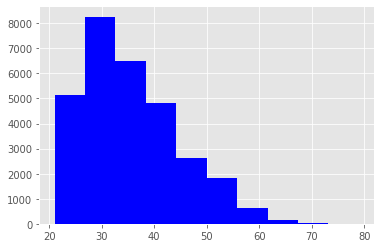

In [75]:
data['AGE'].hist(color='blue')

#### Scatter plots

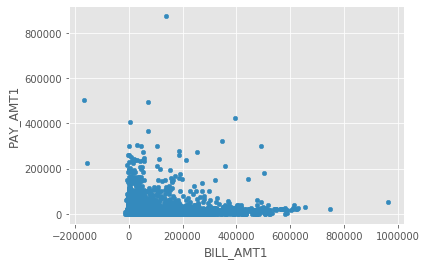

In [76]:
data.plot(kind='scatter', x='BILL_AMT1', y='PAY_AMT1')

### Plot histograms by different groupby keys
Example, how doe the age distribution for male and female look like?


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f85ddc2ff28>,
      dtype=object)

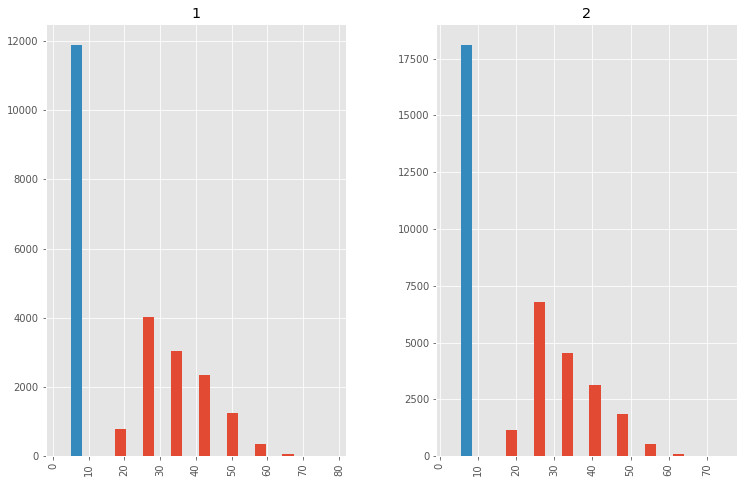

In [77]:
data[['AGE','SEX']].hist(by='SEX', figsize=(12, 8))

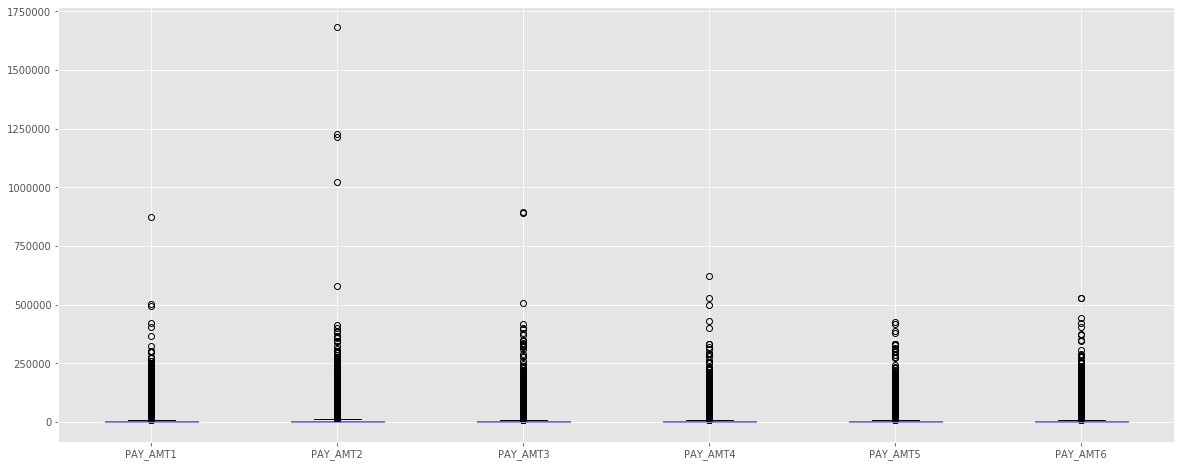

In [78]:
data[[col for col in data.columns if 'PAY_AMT' in col]].plot.box(figsize=(20, 8))

### Time series

`Definition`: a time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

In pandas you can plot time series as well.
By selecting a column and then calling plot, it will plot the values ordered by the index

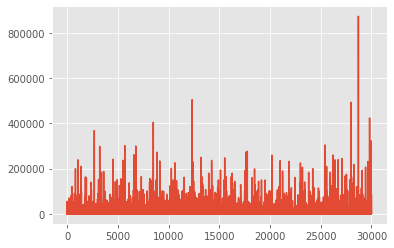

In [79]:
# This is not really a time series (as each index represent a different client, so they are not a dependent sequence), 
# but we show it here for the sake of teaching the pandas API 
data['PAY_AMT1'].plot()

### More on functions with pandas

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/anilkumarpanda/python-training-2021/main/data/UCI_Credit_Card.csv')

In [82]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [83]:
def function_with_good_docstring(df, column):
    """
    This function returns the squareroot of a given column. 
    
    Args:
        df (pandas DataFrame): The transactional data
        column (str): The name of the column on which we calculate the squareroot.
        
    Returns:
        df with transformed column
    """
    df[column] = np.sqrt(df[column])
    
    return df

In [84]:
function_with_good_docstring(df, column='LIMIT_BAL').head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,141.421356,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,346.410162,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,300.000000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,223.606798,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,223.606798,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [85]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,141.421356,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,346.410162,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,300.000000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,223.606798,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,223.606798,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Do you notice how the dataframe is now permanently changed after applying the function?

This is subtle but we most likely do not want this. We want the original object to stay the same and a separate transformed dataframe. How do we achieve this?

Enter `.copy()`

This allows us to stop continously overwriting our objects

### Chaining

Pandas has a great method for chaining that most people don't seem to use. 
Let's take a look at some common (and mostly bad) methods of applying multiple functions

Let's say we need to calculate the following for the balance (x):

`y = 3x**2 + 4`

In [86]:
def first_transformation(df, column='LIMIT_BAL'):
    """
    Squares a given column. 
    
    Args:
        df (pandas DataFrame): The transactional data
        column (str): The name of the column which we square
        
    Returns:
        df with squared column
    """
    df[column] = df[column]**2
    return df

def second_transformation(df, column='LIMIT_BAL', factor=3):
    """
    Multiplies a given column by a given factor. 
    
    Args:
        df (pandas DataFrame): The transactional data
        column (str): The name of the column on which we multiple the factor.
        factor (float): The factor
        
    Returns:
        df with multipled column
    """
    df[column] = df[column]*factor
    return df

def third_transformation(df, column='LIMIT_BAL', factor=4):
    """
    Adds a given factor to a given column. 
    
    Args:
        df (pandas DataFrame): The transactional data
        column (str): The name of the column on which we add the factor.
        factor (float): The factor
        
    Returns:
        df with divided column
    """
    df[column] = df[column] + factor
    return df
    

### Ugly method number 1

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/anilkumarpanda/python-training-2021/main/data/UCI_Credit_Card.csv')
df = third_transformation(second_transformation(first_transformation(df)))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,1.200000e+09,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,4.320000e+10,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,2.430000e+10,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,7.500000e+09,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,7.500000e+09,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Ugly (but common) method number 2

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/anilkumarpanda/python-training-2021/main/data/UCI_Credit_Card.csv')
df = df.copy()
df = first_transformation(df)
df = second_transformation(df)
df = third_transformation(df)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,1.200000e+09,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,4.320000e+10,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,2.430000e+10,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,7.500000e+09,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,7.500000e+09,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Best practice

In [89]:
def read_data(path):
    # What is this function missing?
    return pd.read_csv(path)

def copy_df(df):
    # What is this function missing?
    return df.copy()

In [91]:
df = read_data(path='https://raw.githubusercontent.com/anilkumarpanda/python-training-2021/main/data/UCI_Credit_Card.csv')

df = (
    copy_df(df)
    .pipe(first_transformation)
    .pipe(second_transformation)
    .pipe(third_transformation)
)

### Note the differences with the arguments

#### Exercise.
1. Write a function that squares BILL_AMT1 if MARRIAGE==1. Save this in a column called "BILL_MANIPULATION".
2. Write another function that divides this new column by LIMIT_BAL. Overwrite BILL_MANIPULATION.
3. Write a final function that sets BILL_AMT2 to 0 if BILL_MANIPULATION > 500
4. Chain all of these together


